### 전국 아파트 평당 분양가 동향 지역별, 연도별 분석 & 시각화

In [2]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
from matplotlib import rcParams,font_manager,rc
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

#### 데이터 로드

##### 2015년~ 2021년 데이터 가져오기

In [3]:
df_list = pd.read_csv('./data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향.csv',encoding='utf-8')
df_list.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"
6289,제주,전용면적 102제곱미터초과,2021,11,"6,815"


##### 2013년~2015년 데이터 가져오기

In [4]:
df_fst = pd.read_csv('./data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='utf-8')

In [5]:
df_fst.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


##### 데이터 전처리

In [6]:
## 분양 가격의 타입 변경
df_list['분양가격(제곱미터)'] = df_list['분양가격(제곱미터)'].str.replace(',','')

In [7]:
pd.to_numeric(df_list['분양가격(제곱미터)'],errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
6285    6860.0
6286       NaN
6287    6787.0
6288    5924.0
6289    6815.0
Name: 분양가격(제곱미터), Length: 6290, dtype: float64

In [8]:
df_list.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


##### 분양가격 컬럼 생성

In [9]:
df_list['분양가격'] = pd.to_numeric(df_list['분양가격(제곱미터)'],errors='coerce')
df_list.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격
0,서울,모든면적,2015,10,5841,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0


##### 평당 분양 가격 컬럼 생성

In [11]:
# 제곱미터 기준이기에 평수 기준으로 새로운 칼럼 생성
df_list['평당분양가격'] = df_list.분양가격 * 3.3
df_list['평당분양가격'].head()

0    19275.3
1    18651.6
2    19410.6
3    18879.3
4    19400.7
Name: 평당분양가격, dtype: float64

In [12]:
df_list.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [13]:
df_list.규모구분.unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

##### 규모구분을 전용 면적 컬럼으로 변경

In [14]:
df_list['전용면적'] = df_list['규모구분'].str.replace('전용면적','')
df_list['전용면적'] = df_list['전용면적'].str.replace('제곱미터초과','~')
df_list['전용면적'] = df_list['전용면적'].str.replace('제곱미터이하','')
df_list['전용면적'] = df_list['전용면적'].str.replace(' ','').str.strip()
df_list['전용면적']

0         모든면적
1           60
2        60~85
3       85~102
4         102~
         ...  
6285      모든면적
6286        60
6287     60~85
6288    85~102
6289      102~
Name: 전용면적, Length: 6290, dtype: object

In [15]:
df_list.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,5841,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6,60
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6,60~85
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3,85~102
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7,102~


In [18]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6290 non-null   object 
 1   연도      6290 non-null   int64  
 2   월       6290 non-null   int64  
 3   분양가격    5781 non-null   float64
 4   평당분양가격  5781 non-null   float64
 5   전용면적    6290 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 295.0+ KB


In [16]:
# 중복열 삭제
df_list.drop(['규모구분','분양가격(제곱미터)'],axis=1,inplace=True)

In [17]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6290 non-null   object 
 1   연도      6290 non-null   int64  
 2   월       6290 non-null   int64  
 3   분양가격    5781 non-null   float64
 4   평당분양가격  5781 non-null   float64
 5   전용면적    6290 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 295.0+ KB


##### 지역별 데이터


In [21]:
df_list.groupby(['지역명']).평당분양가격.mean()

지역명
강원     8630.984078
경기    13803.320270
경남     9821.375900
경북     9043.574138
광주    11143.459223
대구    13077.543490
대전    10581.153846
부산    12586.699459
서울    25362.470959
세종    10379.998095
울산    11297.440909
인천    12996.175410
전남     8219.511667
전북     8047.690164
제주    13085.297315
충남     8603.278632
충북     7919.892391
Name: 평당분양가격, dtype: float64

##### 전용면적별 평당분양가격의 평균

In [22]:
df_list.groupby(['전용면적']).평당분양가격.mean()

전용면적
102~      12291.705282
60        11097.897199
60~85     11091.488952
85~102    11952.270987
모든면적      11110.922124
Name: 평당분양가격, dtype: float64

##### 지역명, 전용면적으로 평당분양가격의 평균 구한 DF만들기

In [27]:
df_list.groupby(['전용면적','지역명']).평당분양가격.mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9712.0,15236.0,10436.0,9834.0,12515.0,14088.0,14875.0,13392.0,25180.0,10536.0,11523.0,15220.0,9128.0,8524.0,12774.0,9069.0,8479.0
60,8328.0,13504.0,9060.0,8560.0,10324.0,12908.0,9951.0,12080.0,25035.0,10220.0,11210.0,12304.0,7703.0,7887.0,14199.0,8165.0,7466.0
60~85,8072.0,13046.0,9133.0,8622.0,10810.0,12890.0,10250.0,12480.0,24315.0,10350.0,11529.0,12435.0,7918.0,7651.0,13198.0,8222.0,7599.0
85~102,8992.0,14152.0,11345.0,9782.0,11587.0,12559.0,9078.0,12450.0,27895.0,10367.0,9904.0,12782.0,8442.0,8519.0,11200.0,9549.0,8524.0
모든면적,8110.0,13078.0,9171.0,8642.0,10925.0,12879.0,10300.0,12532.0,24376.0,10381.0,11456.0,12361.0,7916.0,7684.0,13309.0,8202.0,7547.0


##### 연도, 지역명으로 평당분양 가격 평균 구하기

In [29]:
year_loc = df_list.groupby(['연도','지역명']).평당분양가격.mean()

In [30]:
year_loc[2015]

지역명
강원     7188.060
경기    11060.940
경남     8459.220
경북     7464.160
광주     7916.700
대구     9018.900
대전     8190.600
부산    10377.400
서울    20315.680
세종     8765.020
울산     9367.600
인천    10976.020
전남     6798.880
전북     7110.400
제주     7951.075
충남     7689.880
충북     6828.800
Name: 평당분양가격, dtype: float64

In [31]:
year_loc.unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615,21864.095,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010,29781.015,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10260.180000,14557.140,11297.520000,11181.540000,13637.662500,15540.600000,11942.800000,14030.880,29186.190,12598.740000,14131.773333,15751.620000,9961.729412,9005.088889,22785.964865,9789.294340,8805.540000


In [40]:
# transpose로 행과 열을 바꾸기
year_loc.unstack().T

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7318.850000,8219.255000,8934.475000,10302.423214,10260.180000
경기,11060.940,11684.970000,12296.185000,14258.420000,15665.540000,15106.080000,14557.140000
경남,8459.220,8496.730000,8806.600000,9327.670000,10697.615789,10919.272222,11297.520000
경북,7464.160,7753.405000,8288.063793,8680.776923,9050.250000,9997.693750,11181.540000
광주,7916.700,9190.683333,9599.700000,9526.953333,12111.675000,13406.485714,13637.662500
대구,9018.900,10282.030000,12191.972222,12139.252632,14081.650000,15314.200000,15540.600000
대전,8190.600,8910.733333,9912.910526,10234.106667,12619.200000,11238.844737,11942.800000
부산,10377.400,10743.535000,11637.615000,12889.965000,13537.865000,13353.010000,14030.880000
서울,20315.680,21753.435000,21864.095000,23202.245000,28286.830000,29781.015000,29186.190000


##### 2013년 9월 ~ 2015년 8월까지 데이터 전처리

In [41]:
df_list.tail()

,지역명,연도,월,분양가격,평당분양가격,전용면적
6285,제주,2021,11,6860.0,22638.0,모든면적
6286,제주,2021,11,NaN,NaN,60
6287,제주,2021,11,6787.0,22397.1,60~85
6288,제주,2021,11,5924.0,19549.2,85~102
6289,제주,2021,11,6815.0,22489.5,102~


In [42]:
df_fst.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [44]:
# 결측치 체크
df_fst.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

##### melt 사용해서 df_list와 형식 같게 만들기

In [45]:
df_fst = df_fst.melt(id_vars='지역',var_name='기간',value_name='평당분양가격')

In [46]:
df_fst.tail()

,지역,기간,평당분양가격
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665
356,제주,2015년8월,7343


In [47]:
# 칼럼 이름 변경
df_fst.columns = ['지역명','기간','평당분양가격']

In [48]:
#연도와 월 분리
df_fst['연도'] = df_fst['기간'].apply(lambda x : int(x.split('년')[0]))

In [50]:
df_fst['월'] = df_fst['기간'].apply(lambda x : x.split('년')[1].replace('월',''))

In [51]:
df_fst.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [52]:
cols = ['지역명','연도','월','평당분양가격']

In [57]:
## 이전 데이터에는 전용면적이 없기에 모든면적만 사용한다.
df_list_prepare = df_list.loc[df_list['전용면적'] =='모든면적',cols].copy()

df_fst_prepare = df_fst[cols].copy()

In [55]:
df_list_prepare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 6285
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     1258 non-null   object 
 1   연도      1258 non-null   int64  
 2   월       1258 non-null   int64  
 3   평당분양가격  1243 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 49.1+ KB


In [58]:
df_fst_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도      357 non-null    int64 
 2   월       357 non-null    object
 3   평당분양가격  357 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.3+ KB


In [61]:
df_fst_prepare.shape, df_list_prepare.shape

((357, 4), (1258, 4))

##### concat으로 데이터 합치기

In [62]:
df = pd.concat([df_fst_prepare,df_list_prepare])

In [64]:
df.tail()

,지역명,연도,월,평당분양가격
6265,전북,2021,11,8976.0
6270,전남,2021,11,9764.7
6275,경북,2021,11,10434.6
6280,경남,2021,11,10692.0
6285,제주,2021,11,22638.0


In [65]:
df.reset_index(drop=True,inplace=True)

##### 데이터 시각화하기

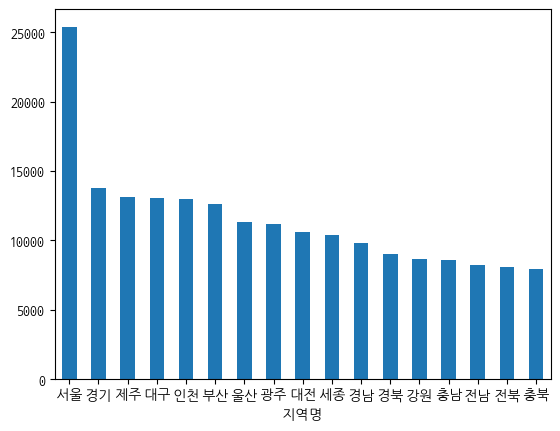

In [74]:
df_list.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False).plot.bar(rot=0)
plt.show()

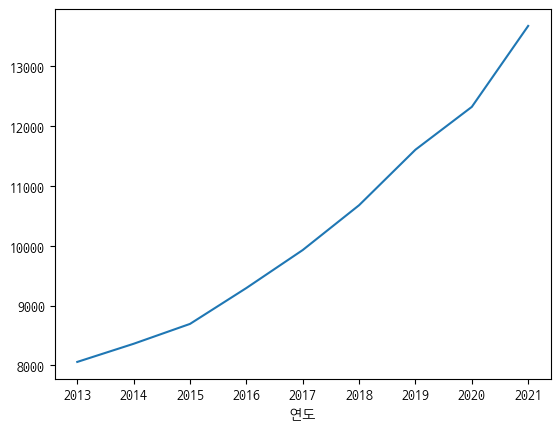

In [77]:
df.groupby(['연도'])['평당분양가격'].mean().plot()
plt.show()

##### Seanborn으로 시각화

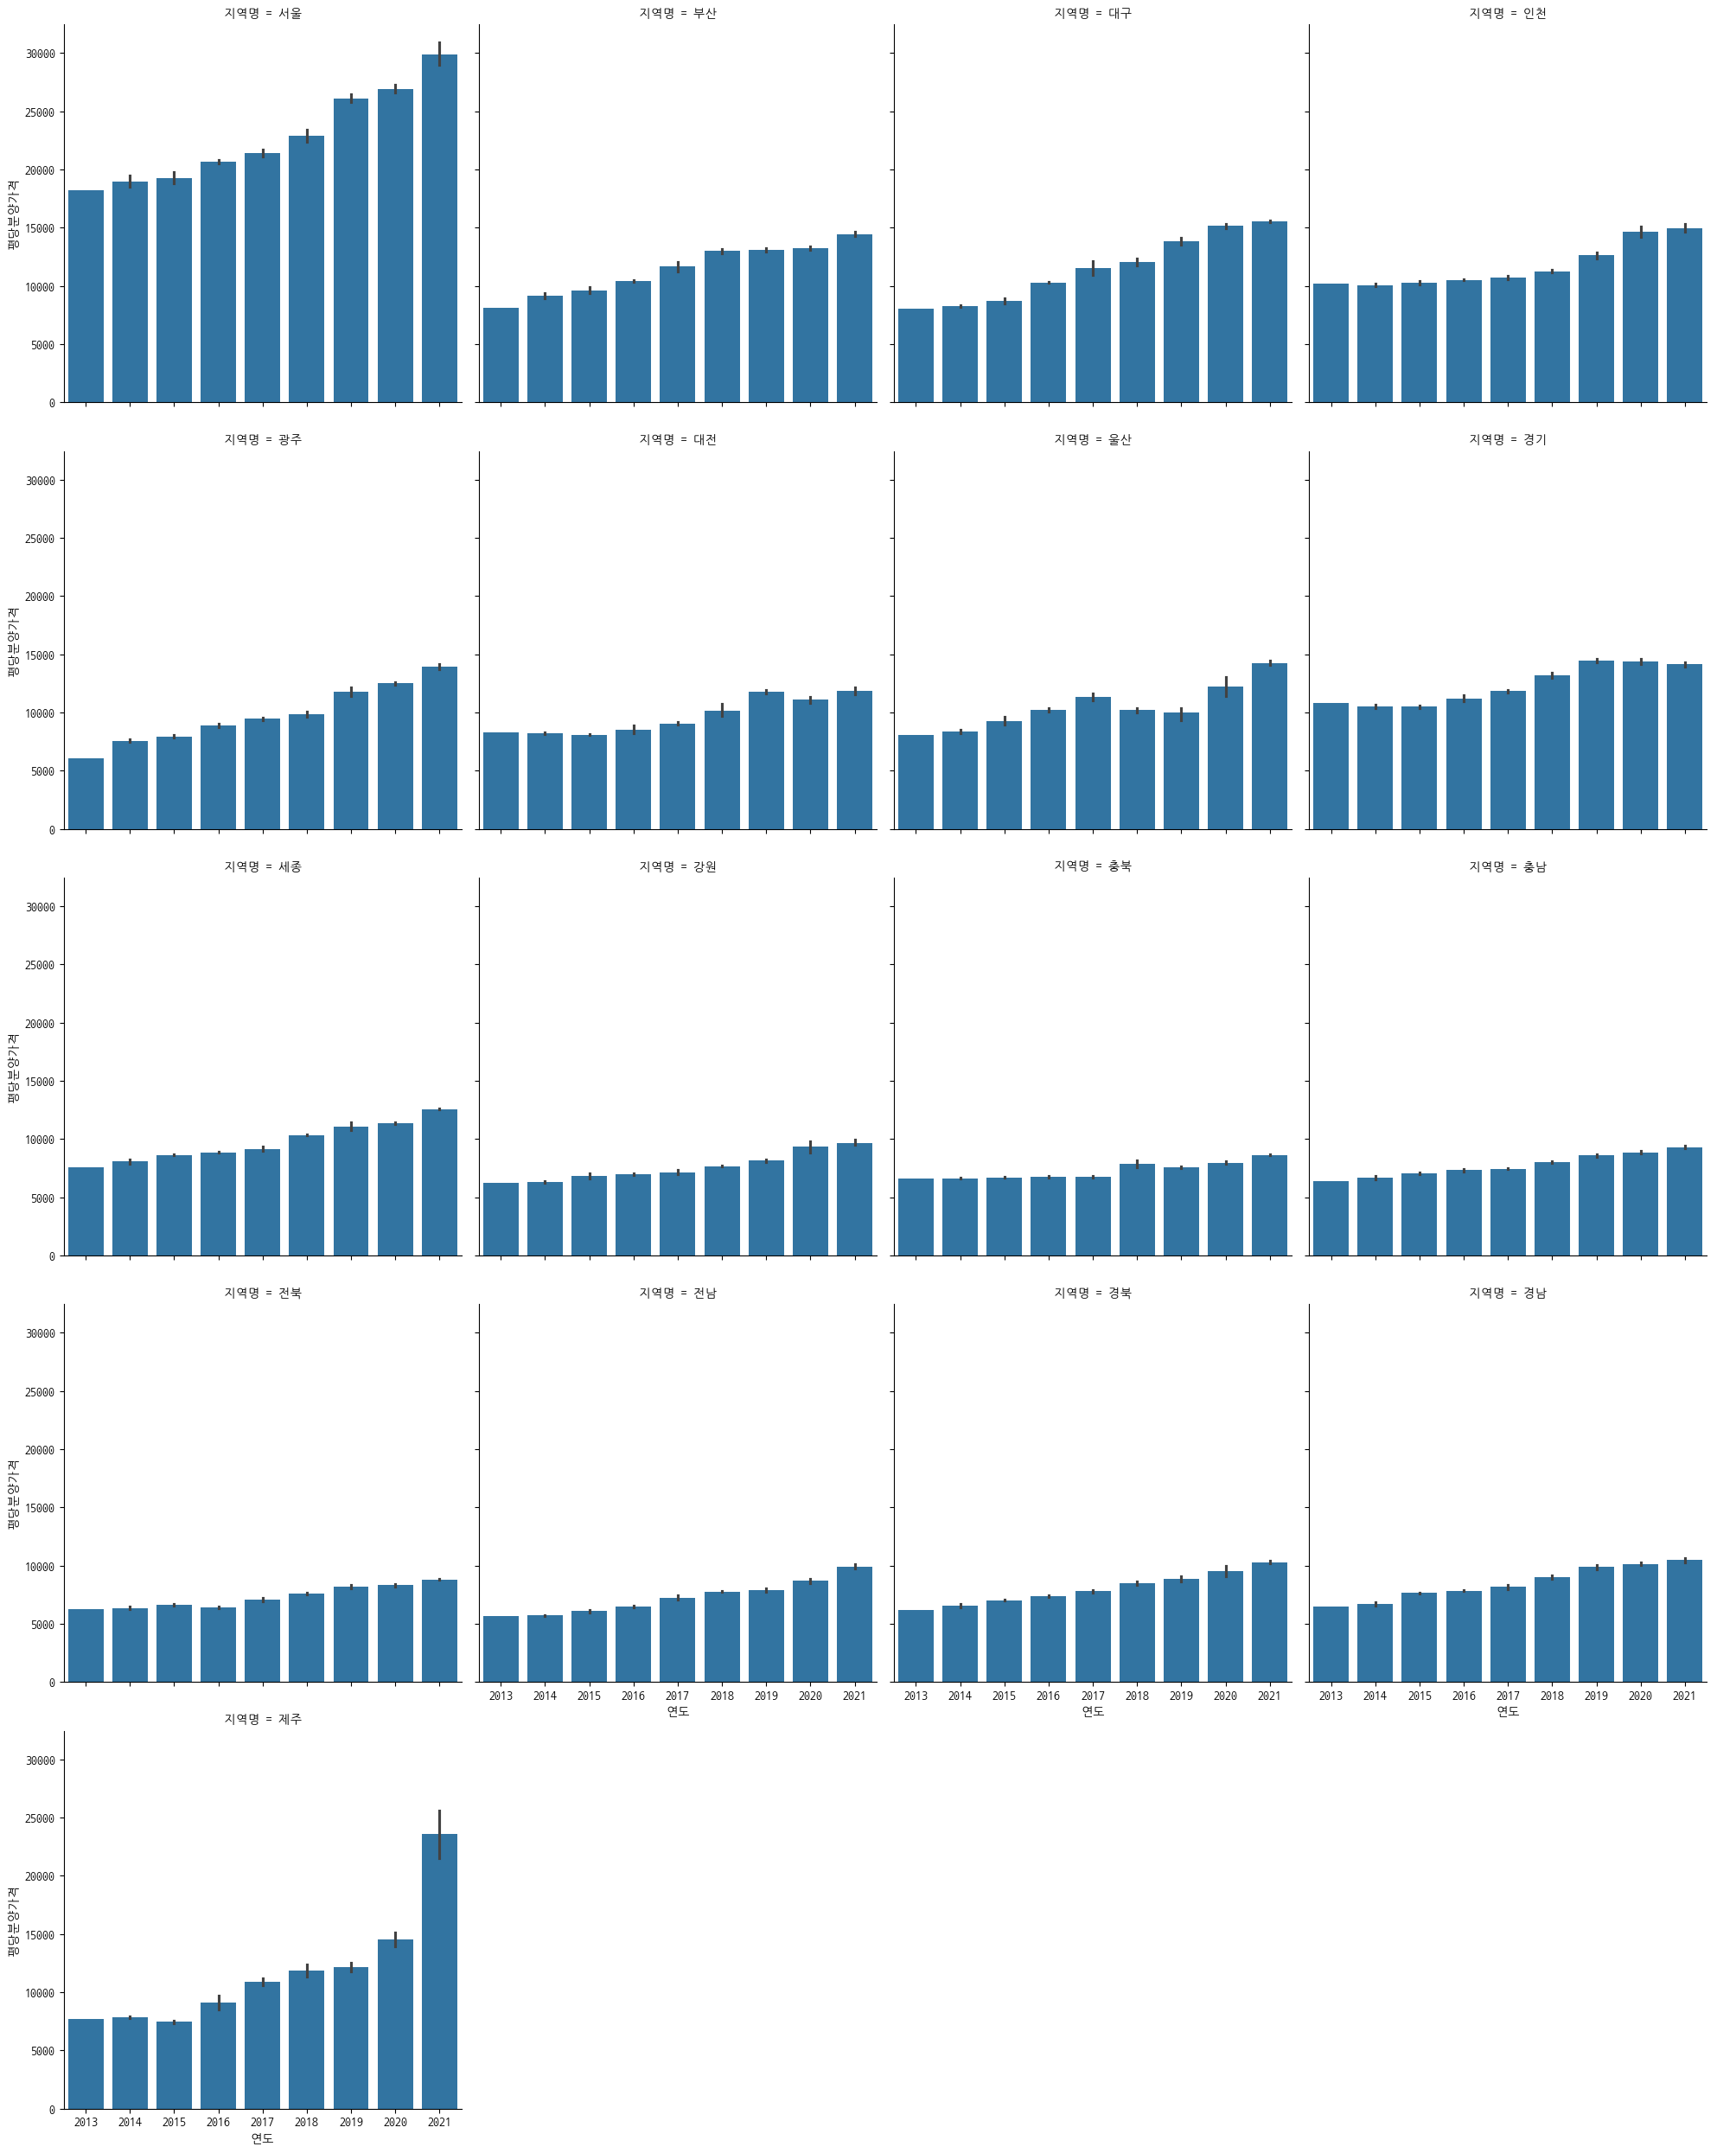

In [83]:
sns.catplot(data=df,x='연도',y='평당분양가격',kind='bar',col='지역명',col_wrap=4)
plt.show()

##### line 차트 그리기

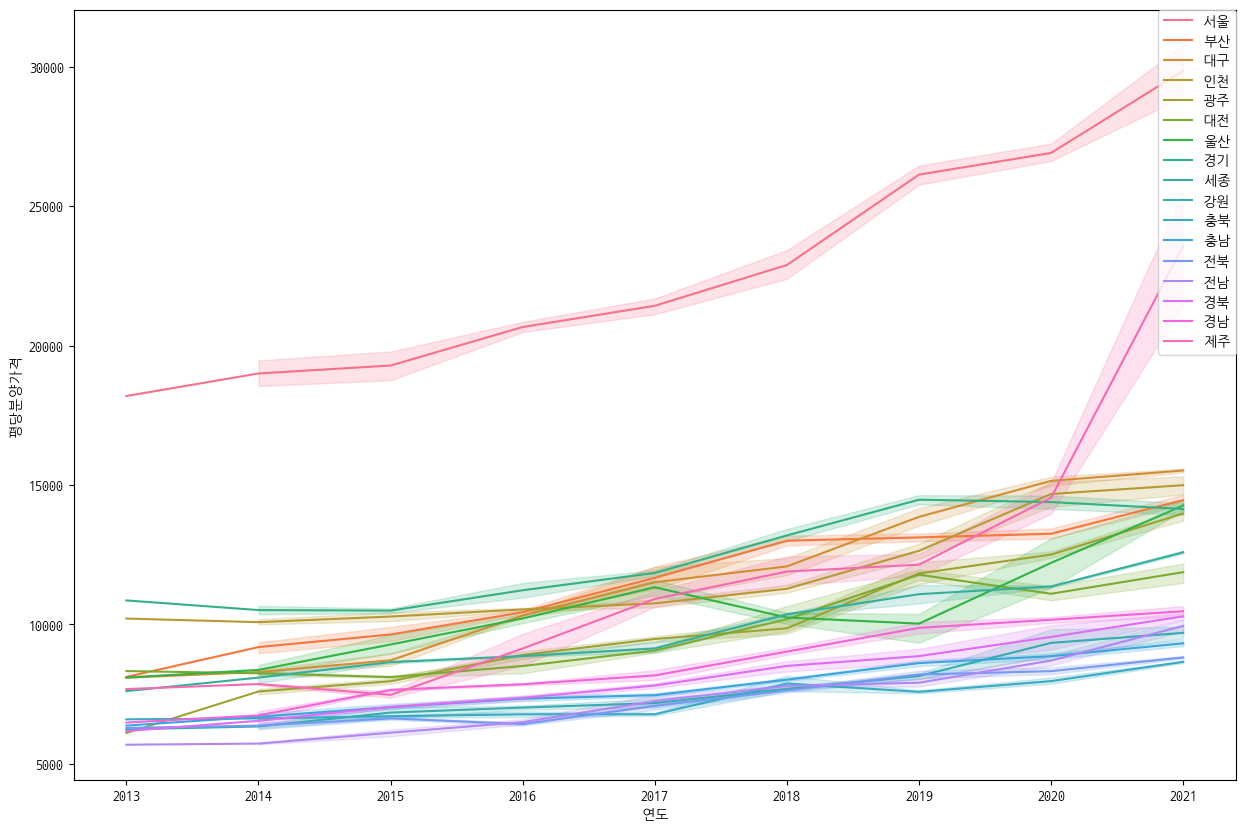

In [90]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='연도',y='평당분양가격',hue='지역명')
plt.legend(loc='upper right',borderaxespad=0)
plt.show()

##### 히트맵 그리기

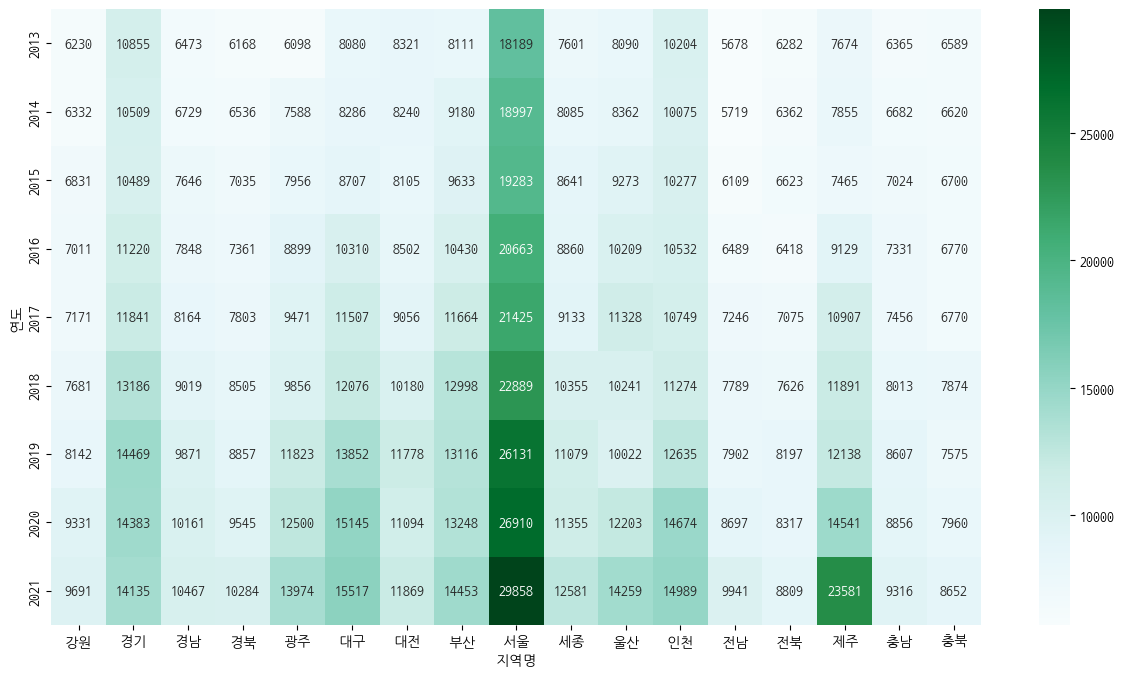

In [103]:
pd_pt= pd.pivot_table(df,index='연도',columns='지역명',values='평당분양가격').round()
plt.figure(figsize= (15,8))
sns.heatmap(pd_pt,cmap="BuGn",annot=True,fmt='.0f')
plt.show()

In [105]:
df.to_csv('./data/지역별_연도별_평당_분양_가격.csv',encoding='utf-8')

## 상관관계 분석

In [14]:
# 전처리된 데이터 불러오기
df = pd.read_csv('./data/지역별_연도별_비교데이터_합본.csv',encoding='utf-8',index_col=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1615 non-null   object 
 1   연도      1615 non-null   int64  
 2   월       1615 non-null   int64  
 3   평당분양가격  1600 non-null   float64
 4   인구수     1615 non-null   int64  
 5   경제활동인구  1615 non-null   int64  
 6   소득      1615 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 100.9+ KB


In [17]:
df['연도'] = df['연도'].astype(str)
df['월'] = df['월'].astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1615 non-null   object 
 1   연도      1615 non-null   object 
 2   월       1615 non-null   object 
 3   평당분양가격  1600 non-null   float64
 4   인구수     1615 non-null   int64  
 5   경제활동인구  1615 non-null   int64  
 6   소득      1615 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 100.9+ KB


In [36]:
df_corr = df[['평당분양가격','인구수','경제활동인구','소득']].corr(method='pearson')
df_corr

,평당분양가격,인구수,경제활동인구,소득
평당분양가격,1.000000,0.537234,0.544592,0.303513
인구수,0.537234,1.000000,0.999519,0.332568
경제활동인구,0.544592,0.999519,1.000000,0.342404
소득,0.303513,0.332568,0.342404,1.000000


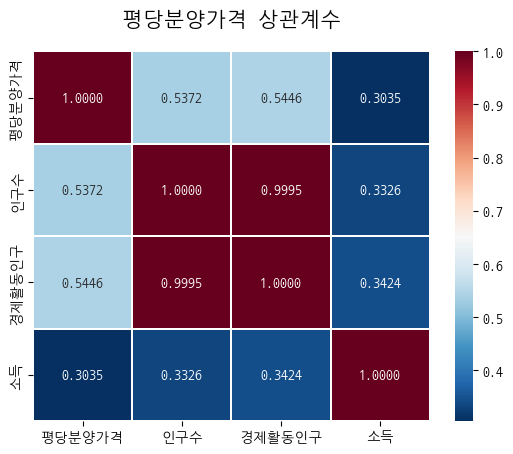

In [37]:
color_map = plt.cm.RdBu_r
plt.title('평당분양가격 상관계수',y=1.05,size= 15)
sns.heatmap(data=df_corr,linewidths=0.1,fmt='.4f',cmap=color_map,annot=True)
plt.show()

##### 선형회귀 분석

In [38]:
from scipy import stats
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [39]:
Rformula = '평당분양가격 ~ 인구수 + 경제활동인구 + 소득'

In [43]:
result = ols(Rformula,data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평당분양가격   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     287.7
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          2.90e-149
Time:                        11:05:11   Log-Likelihood:                -15285.
No. Observations:                1600   AIC:                         3.058e+04
Df Residuals:                    1596   BIC:                         3.060e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7771.2860    391.584     19.846      0.000    7003.212    8539.360
인구수           -0.0090      0.001     -9.886      0.000      -0.011      -0.007
경제활동인구         0.0178      0.002     10.604      0.000       0.015       0.021
소득             3.2642      1.385      2.356      0.019       0.547       5.981
==============================================================================
Omnibus:                      366.567   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.461
Skew:                           1.237   Prob(JB):                    1.18e-193
Kurtosis:                       5.684   Cond. No.                     2.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

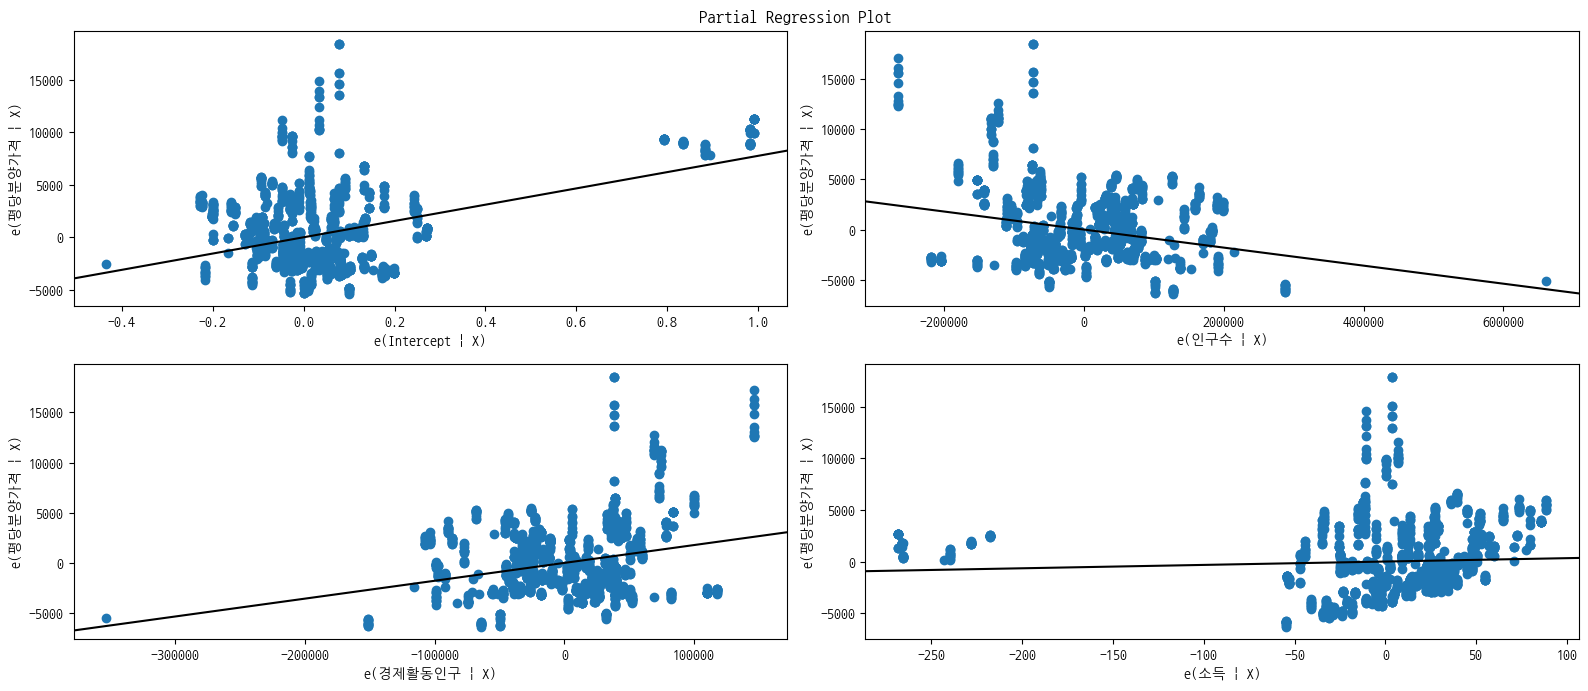

In [44]:
fig = plt.figure(figsize=(16,7))
sm.graphics.plot_partregress_grid(result,fig=fig)
plt.show()